<a href="https://colab.research.google.com/github/PromitHal/AI_ML/blob/main/Music_Further.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [48]:
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import numpy as np
import pandas as pd

In [53]:
data=pd.read_csv('sheet1.csv')

In [54]:
data.head()

,filename,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,rolloff_mean,rolloff_var,zero_crossing_rate_mean,zero_crossing_rate_var,harmony_mean,harmony_var,perceptr_mean,perceptr_var,tempo,mfcc1_mean,mfcc1_var,mfcc2_mean,mfcc2_var,mfcc3_mean,mfcc3_var,mfcc4_mean,mfcc4_var,mfcc5_mean,mfcc5_var,mfcc6_mean,mfcc6_var,mfcc7_mean,mfcc7_var,mfcc8_mean,mfcc8_var,mfcc9_mean,mfcc9_var,mfcc10_mean,mfcc10_var,mfcc11_mean,mfcc11_var,mfcc12_mean,mfcc12_var,mfcc13_mean,mfcc13_var,mfcc14_mean,mfcc14_var,mfcc15_mean,mfcc15_var,mfcc16_mean,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,blues.00000.0.wav,66149,0.335406,0.091048,0.130405,0.003521,1773.065032,167541.63090,1972.744388,117335.77160,3714.560359,1.080790e+06,0.081851,0.000558,-0.000078,0.008354,-0.000068,0.005535,129.199219,-118.627914,2440.286621,125.083626,260.956909,-23.443724,364.081726,41.321484,181.694855,-5.976108,152.963135,20.115141,75.652298,-16.045410,40.227104,17.855198,84.320282,-14.633434,83.437233,10.270527,97.001335,-9.708279,66.669891,10.183875,45.103611,-4.681614,34.169498,8.417439,48.269444,-7.233477,42.770947,-2.853603,39.687145,-3.241280,36.488243,0.722209,38.099152,-5.050335,33.618073,-0.243027,43.771767,blues
1,blues.00000.1.wav,66149,0.343065,0.086147,0.112699,0.001450,1816.693777,90525.69087,2010.051501,65671.87567,3869.682242,6.722448e+05,0.087173,0.001030,-0.000099,0.004950,-0.000103,0.004854,123.046875,-125.590706,2038.344238,122.421226,216.774185,-20.718019,231.979767,50.128387,142.700409,-11.333303,139.243118,21.385401,77.817947,-15.960796,97.364029,19.454103,57.948093,-12.465918,68.271523,17.898169,56.222176,-11.732554,54.373909,8.145000,40.662876,-7.717751,30.808521,8.397150,48.784225,-8.300493,68.584824,4.074709,64.748276,-6.055294,40.677654,0.159015,51.264091,-2.837699,97.030830,5.784063,59.943081,blues
2,blues.00000.2.wav,66149,0.346815,0.092243,0.132003,0.004620,1788.539719,111407.43760,2084.565132,75124.92172,3997.639160,7.907127e+05,0.071383,0.000425,-0.000066,0.012476,0.000065,0.004357,123.046875,-132.441940,3798.532227,115.085175,257.321289,-14.811666,192.448074,50.189293,144.166031,-0.680819,128.376892,24.650375,66.371170,-13.506104,89.319336,15.643386,55.253967,-13.216637,120.308785,10.406025,35.757862,-7.991465,47.911613,11.853963,36.569931,-4.677677,40.725075,6.571110,30.686846,-2.424750,50.313499,4.806280,67.336563,-1.768610,28.348579,2.378768,45.717648,-1.938424,53.050835,2.517375,33.105122,blues
3,blues.00000.3.wav,66149,0.363639,0.086856,0.132565,0.002448,1655.289045,111952.28450,1960.039988,82913.63927,3568.300218,9.216524e+05,0.069426,0.000304,-0.000014,0.008318,0.000018,0.005927,123.046875,-118.231087,2508.781006,132.116501,332.650574,-18.758335,109.357529,39.769306,184.693344,-13.260426,144.398224,20.468134,122.516464,-14.563448,68.937332,18.745104,74.748886,-13.755463,73.868576,12.993759,41.549564,-12.648887,58.540478,10.389314,39.102024,-4.362739,60.714748,9.156193,40.411537,-9.889441,44.666325,-1.359111,47.739452,-3.841155,28.337118,1.218588,34.770935,-3.580352,50.836224,3.630866,32.023678,blues
4,blues.00000.4.wav,66149,0.335579,0.088129,0.143289,0.001701,1630.656199,79667.26765,1948.503884,60204.02027,3469.992864,6.102111e+05,0.070095,0.000289,0.000041,0.009634,-0.000106,0.005833,123.046875,-105.968376,2118.919922,134.643646,219.562622,-19.961748,171.878754,40.171753,103.120712,-14.271939,102.651230,18.734617,79.070000,-15.619381,48.510284,19.207966,53.642956,-18.274683,95.300995,14.316693,58.821163,-5.792194,55.030254,17.045437,43.229939,-5.681399,46.515259,5.705521,24.956211,-7.986080,39.816933,2.092937,30.336359,0.664582,45.880913,1.689446,51.363583,-3.392489,26.738789,0.536961,29.146694,blues


In [55]:
data=data.dropna(axis=0,how='any')

In [56]:
data.shape

(9990, 60)

In [57]:
X=data.drop(columns="label")

In [58]:
X=X.drop(columns="filename")
X=X.drop(columns="length")

In [59]:
Y=data["label"]

In [60]:
Y=pd.get_dummies(Y)

In [61]:
Y.head()

,blues,classical,country,disco,hiphop,jazz,metal,pop,reggae,rock
0,1,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0


In [62]:
categories=["blues","classical","country","disco","hiphop","jazz","metal","pop","reggae","rock"]



In [63]:
from sklearn.model_selection import train_test_split

In [289]:
(X_train,X_test,Y_train,Y_test)=train_test_split(X,Y,test_size=0.2,stratify=Y,random_state=42)

In [290]:
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [66]:
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dropout

In [67]:
Y_train.shape

(7992, 10)

In [94]:
model_new=Sequential()
model_new.add(Dense(256,input_shape=(57,),activation='relu'))
model_new.add(Dense(512,activation='relu'))
model_new.add(Dense(256,activation='relu'))
model_new.add(Dense(128,activation='relu'))
model_new.add(Dense(64,activation='relu'))
model_new.add(Dense(32,activation='relu'))
model_new.add(Dropout(0.5))
model_new.add(Dense(10,activation='softmax'))
model_new.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_48 (Dense)            (None, 256)               14848     
                                                                 
 dense_49 (Dense)            (None, 512)               131584    
                                                                 
 dense_50 (Dense)            (None, 256)               131328    
                                                                 
 dense_51 (Dense)            (None, 128)               32896     
                                                                 
 dense_52 (Dense)            (None, 64)                8256      
                                                                 
 dense_53 (Dense)            (None, 32)                2080      
                                                                 
 dropout_11 (Dropout)        (None, 32)              

In [100]:
model=Sequential()
model.add(Dense(1024,input_shape=(57,),activation='relu'))
model.add(Dense(1024,activation='relu'))
model.add(Dense(512,activation='relu'))
model.add(Dense(512,activation='relu'))
model.add(Dense(256,activation='relu'))
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(128,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(10,activation='softmax'))
model.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_63 (Dense)            (None, 1024)              59392     
                                                                 
 dense_64 (Dense)            (None, 1024)              1049600   
                                                                 
 dense_65 (Dense)            (None, 512)               524800    
                                                                 
 dense_66 (Dense)            (None, 512)               262656    
                                                                 
 dense_67 (Dense)            (None, 256)               131328    
                                                                 
 dense_68 (Dense)            (None, 128)               32896     
                                                                 
 dropout_14 (Dropout)        (None, 128)             

In [443]:
model_new=Sequential()
model_new.add(Dense(512,input_shape=(57,),activation='relu'))
model_new.add(Dense(256,activation='relu'))
model_new.add(Dense(128,activation='relu'))
model_new.add(Dense(64,activation='relu'))
model_new.add(Dense(32,activation='relu'))
model_new.add(Dropout(0.5))
model_new.add(Dense(10,activation='softmax'))
model_new.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_73 (Dense)            (None, 512)               29696     
                                                                 
 dense_74 (Dense)            (None, 256)               131328    
                                                                 
 dense_75 (Dense)            (None, 128)               32896     
                                                                 
 dense_76 (Dense)            (None, 64)                8256      
                                                                 
 dense_77 (Dense)            (None, 32)                2080      
                                                                 
 dropout_16 (Dropout)        (None, 32)                0         
                                                                 
 dense_78 (Dense)            (None, 10)              

In [101]:
model.compile(optimizer=Adam(learning_rate=0.001),loss='categorical_crossentropy',metrics=['accuracy'])

In [102]:
history=model.fit(x=X_train,y=Y_train,validation_split=0.2,shuffle=True,steps_per_epoch=20,epochs=200)

Epoch 1/200
20/20 [==============================] - 3s 123ms/step - loss: 1.9312 - accuracy: 0.2975 - val_loss: 1.4234 - val_accuracy: 0.4847
Epoch 2/200
20/20 [==============================] - 2s 109ms/step - loss: 1.4141 - accuracy: 0.5181 - val_loss: 1.0886 - val_accuracy: 0.6667
Epoch 3/200
20/20 [==============================] - 2s 106ms/step - loss: 1.0944 - accuracy: 0.6504 - val_loss: 0.9268 - val_accuracy: 0.7192
Epoch 4/200
20/20 [==============================] - 2s 116ms/step - loss: 0.8677 - accuracy: 0.7333 - val_loss: 0.8252 - val_accuracy: 0.7480
Epoch 5/200
20/20 [==============================] - 2s 111ms/step - loss: 0.7173 - accuracy: 0.7921 - val_loss: 0.6635 - val_accuracy: 0.8018
Epoch 6/200
20/20 [==============================] - 2s 112ms/step - loss: 0.5686 - accuracy: 0.8367 - val_loss: 0.6400 - val_accuracy: 0.8118
Epoch 7/200
20/20 [==============================] - 2s 106ms/step - loss: 0.4600 - accuracy: 0.8736 - val_loss: 0.5943 - val_accuracy: 0.8211

In [444]:
model_new.compile(optimizer=Adam(learning_rate=0.001),loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [446]:
Y_train_dummy_new=np.array(Y_train_dummy)

In [449]:
Y_train_dummy_new[0]

5

In [471]:
model_new_1=Sequential()
model_new_1.add(Dense(512,input_shape=(57,),activation='relu'))
model_new_1.add(Dense(256,activation='relu'))
model_new_1.add(Dense(128,activation='relu'))
model_new_1.add(Dense(128,activation='relu'))
model_new_1.add(Dense(64,activation='relu'))
model_new_1.add(Dropout(0.25))
model_new_1.add(Dense(64,activation='relu'))
model_new_1.add(Dense(32,activation='relu'))
model_new_1.add(Dense(16,activation='relu'))
model_new_1.add(Dropout(0.25))
model_new_1.add(Dense(10,activation='softmax'))
model_new_1.summary()

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_88 (Dense)            (None, 512)               29696     
                                                                 
 dense_89 (Dense)            (None, 256)               131328    
                                                                 
 dense_90 (Dense)            (None, 128)               32896     
                                                                 
 dense_91 (Dense)            (None, 128)               16512     
                                                                 
 dense_92 (Dense)            (None, 64)                8256      
                                                                 
 dropout_19 (Dropout)        (None, 64)                0         
                                                                 
 dense_93 (Dense)            (None, 64)              

In [462]:
from tensorflow.keras.optimizers import RMSprop

In [472]:
model_new_1.compile(optimizer=RMSprop(learning_rate=0.001),loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [473]:
history_new_1=model_new_1.fit(x=X_train,y=Y_train_dummy_new,validation_split=0.2,shuffle=True,steps_per_epoch=20,epochs=600)

Epoch 1/600
20/20 [==============================] - 2s 36ms/step - loss: 2.1019 - accuracy: 0.2093 - val_loss: 1.7597 - val_accuracy: 0.3515
Epoch 2/600
20/20 [==============================] - 0s 25ms/step - loss: 1.7697 - accuracy: 0.3496 - val_loss: 1.5501 - val_accuracy: 0.4509
Epoch 3/600
20/20 [==============================] - 0s 22ms/step - loss: 1.5940 - accuracy: 0.4192 - val_loss: 1.3877 - val_accuracy: 0.5184
Epoch 4/600
20/20 [==============================] - 0s 23ms/step - loss: 1.4261 - accuracy: 0.4777 - val_loss: 1.2241 - val_accuracy: 0.5560
Epoch 5/600
20/20 [==============================] - 0s 25ms/step - loss: 1.3188 - accuracy: 0.5224 - val_loss: 1.2502 - val_accuracy: 0.5353
Epoch 6/600
20/20 [==============================] - 0s 25ms/step - loss: 1.2343 - accuracy: 0.5526 - val_loss: 1.1190 - val_accuracy: 0.5941
Epoch 7/600
20/20 [==============================] - 1s 26ms/step - loss: 1.1569 - accuracy: 0.5809 - val_loss: 1.0709 - val_accuracy: 0.6435
Epoch 

In [450]:
history_new=model_new.fit(x=X_train,y=Y_train_dummy_new,validation_split=0.2,shuffle=True,steps_per_epoch=20,epochs=600)

Epoch 1/200
20/20 [==============================] - 2s 29ms/step - loss: 2.0136 - accuracy: 0.2695 - val_loss: 1.5984 - val_accuracy: 0.4941
Epoch 2/200
20/20 [==============================] - 0s 20ms/step - loss: 1.5796 - accuracy: 0.4538 - val_loss: 1.2332 - val_accuracy: 0.6279
Epoch 3/200
20/20 [==============================] - 0s 21ms/step - loss: 1.3388 - accuracy: 0.5468 - val_loss: 1.0477 - val_accuracy: 0.6754
Epoch 4/200
20/20 [==============================] - 0s 22ms/step - loss: 1.1527 - accuracy: 0.6155 - val_loss: 0.8987 - val_accuracy: 0.7179
Epoch 5/200
20/20 [==============================] - 0s 17ms/step - loss: 0.9989 - accuracy: 0.6728 - val_loss: 0.8108 - val_accuracy: 0.7417
Epoch 6/200
20/20 [==============================] - 0s 18ms/step - loss: 0.8978 - accuracy: 0.7112 - val_loss: 0.7208 - val_accuracy: 0.7792
Epoch 7/200
20/20 [==============================] - 0s 21ms/step - loss: 0.7909 - accuracy: 0.7430 - val_loss: 0.6845 - val_accuracy: 0.7911
Epoch 

In [103]:
model.save('music_model.h5')

In [280]:
!pip install plot_keras_history

  Created wheel for plot-keras-history: filename=plot_keras_history-1.1.30-py3-none-any.whl size=8793 sha256=57c2b953f9596cb323d7f62664061ce5ed3dcd609b9eed21834968b2e01138f0
  Stored in directory: /root/.cache/pip/wheels/b0/60/47/8c5aa37c06be5e97879ec467bc2e6a30b315d95f662c63a503
  Created wheel for sanitize-ml-labels: filename=sanitize_ml_labels-1.0.29-py3-none-any.whl size=7877 sha256=4be4589034e38e5c39a85c05769eac4e7b65eb574f616e85c2274ce1edd4ce95
  Stored in directory: /root/.cache/pip/wheels/c2/f5/71/d1c459da10abec864a1979b449edbf37d4a82ab3e38a3625a8
  Created wheel for compress-json: filename=compress_json-1.0.4-py3-none-any.whl size=4585 sha256=86d4cd22e38a9eca99fef66e913eda58a035bd8b0c8312e9b0e88568547d1877
  Stored in directory: /root/.cache/pip/wheels/1e/ef/1e/5d403c5632b0462471a8d26049d0c138134d0255ec60ce4c14
Successfully built plot-keras-history sanitize-ml-labels compress-json


In [281]:
from plot_keras_history import show_history, plot_history
import matplotlib.pyplot as plt


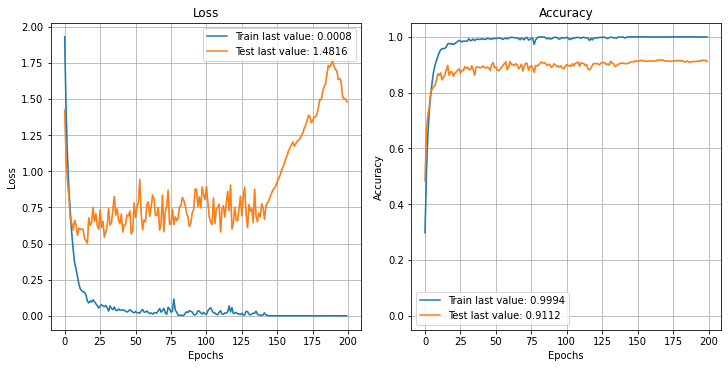

In [285]:
plot_history(history)
plt.show()

In [287]:
loaded_model=load_model('music_model.h5')

In [291]:
# Evaluate the model
loss, acc = loaded_model.evaluate(X_test,Y_test, verbose=2)
print("Untrained model, accuracy: {:5.2f}%".format(100 * acc))

63/63 - 0s - loss: 1.6492 - accuracy: 0.9059 - 380ms/epoch - 6ms/step
Untrained model, accuracy: 90.59%


In [105]:
from tensorflow.keras.models import load_model

In [106]:
loaded_model=load_model('music_model.h5')

In [109]:
np.argmax(loaded_model.predict(X_test[0:1]))

1

In [111]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [114]:
type(Y_train)

pandas.core.frame.DataFrame

In [157]:
Y_test_new=np.array(Y_test)

In [156]:
Y_test_dummy=[]

In [158]:
for i in range(Y_test.shape[0]):
  for j in range(Y_test.shape[1]):
    if Y_test_new[i][j]==1:
      Y_test_dummy.append(j)
     

In [125]:
Y_train_dummy[100:112]

[4, 9, 1, 0, 2, 0, 6, 5, 6, 4, 2, 5]

In [145]:
from sklearn import tree
clftree=tree.DecisionTreeClassifier(max_depth=20)
clftree.fit(X_train,Y_train)

DecisionTreeClassifier(max_depth=20)

In [146]:
tree_pred=clftree.predict(X_test)

In [133]:
tree_pred[0]

array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0], dtype=uint8)

In [139]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [147]:
accuracy_score(Y_test,tree_pred)

0.6366366366366366

In [150]:
from sklearn import svm


In [148]:
from sklearn.model_selection import GridSearchCV

In [152]:
params={'C':(0.001,0.005,0.01,0.05,0.1,0.5,1,5,10,50,100,500,1000)}
clf_svm_l=svm.SVC(kernel='poly')
svm_grid_lin=GridSearchCV(clf_svm_l,params,n_jobs=-1,cv=10,verbose=1,scoring='accuracy')
svm_grid_lin.fit(X_train,Y_train_dummy)

Fitting 10 folds for each of 13 candidates, totalling 130 fits


GridSearchCV(cv=10, estimator=SVC(kernel='poly'), n_jobs=-1,
             param_grid={'C': (0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10, 50,
                               100, 500, 1000)},
             scoring='accuracy', verbose=1)

In [153]:
svm_grid_lin.best_params_

{'C': 10}

In [154]:
linsvm_clf=svm_grid_lin.best_estimator_

In [159]:
accuracy_score(Y_test_dummy,linsvm_clf.predict(X_test))

0.8998998998998999

In [162]:
linsvm_clf.predict(X_test[100:101])

array([4])

In [163]:
from sklearn.neighbors import KNeighborsClassifier


In [164]:
knn = KNeighborsClassifier(n_neighbors=10, metric='euclidean')
knn.fit(X_train, Y_train)

KNeighborsClassifier(metric='euclidean', n_neighbors=10)

In [176]:
y_pred = knn.predict(X_test)

In [177]:
accuracy_score(Y_test,y_pred)

0.7377377377377378

In [168]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
clf = LinearDiscriminantAnalysis()
clf.fit(X_train,Y_train_dummy)


LinearDiscriminantAnalysis()

In [433]:
clf_pred=clf.predict(X_test)

In [435]:
clf_pred[10]

2

In [173]:
accuracy_score(Y_test_dummy,clf_pred)

0.6761761761761762

In [178]:
models=["model","linsvm_clf","knn"]

In [ ]:
Y_res=np.zeros()

In [182]:
 from sklearn.naive_bayes import GaussianNB

In [183]:
gnb = GaussianNB()


In [186]:
 gnb.fit(X_train, Y_train_dummy)

GaussianNB()

In [187]:
y_pred_new=gnb.predict(X_test)

In [189]:
accuracy_score(Y_test_dummy,y_pred_new)

0.5185185185185185

In [359]:
predictions_final=[]

In [230]:
X_test=np.array(X_test)

In [232]:
null=X_test[0].reshape(1,-1)

In [233]:
null.shape

(1, 57)

In [237]:
X_test.shape

(1998, 57)

In [236]:
loaded_model.predict(null)

array([[0., 0., 0., 0., 0., 0., 0., 0., 1., 0.]], dtype=float32)

In [251]:
linsvm_clf.predict(X_test[0:1])

array([4])

In [256]:
X_test=np.array(X_test)

In [466]:
predictions_final=[]
for i in range(X_test.shape[0]):
  temp=np.zeros((1,6))
  #_newX_test[i]=X_test[i].reshape((1,-1))
  temp[0][0]=int(np.argmax(loaded_model.predict(X_test[i:i+1])))
  temp[0][1]=(linsvm_clf.predict(X_test[i:i+1]))
  temp[0][2]=int(np.argmax(knn.predict(X_test[i:i+1])))
  temp[0][3]=clf.predict(X_test[i:i+1])
  temp[0][4]=int(np.argmax(model_new.predict(X_test[i:i+1])))
  temp[0][5]=int(np.argmax(model_new_1.predict(X_test[i:i+1])))
  predictions_final.append(temp)


In [361]:
rescue=predictions_final

In [294]:
np.argmax(loaded_model.predict(X_test[0:1]))

1

In [295]:
linsvm_clf.predict(X_test[100:101])

array([4])

In [273]:
Y_test=np.array(Y_test)

In [275]:
np.argmax(Y_test[0])

5

In [276]:
np.argmax(knn.predict(X_test[0:1]))

0

In [323]:
predictions_final[:15]

[array([[1., 1., 1.]]),
 array([[4., 4., 4.]]),
 array([[6., 6., 6.]]),
 array([[7., 7., 7.]]),
 array([[7., 7., 7.]]),
 array([[2., 2., 2.]]),
 array([[5., 5., 0.]]),
 array([[1., 1., 1.]]),
 array([[8., 8., 8.]]),
 array([[2., 0., 0.]]),
 array([[1., 1., 1.]]),
 array([[8., 8., 0.]]),
 array([[1., 1., 1.]]),
 array([[1., 1., 1.]]),
 array([[9., 9., 7.]])]

In [474]:
Y_test[:15]

,blues,classical,country,disco,hiphop,jazz,metal,pop,reggae,rock
5008,0,0,0,0,0,1,0,0,0,0
4635,0,0,0,0,1,0,0,0,0,0
6766,0,0,0,0,0,0,1,0,0,0
7682,0,0,0,0,0,0,0,1,0,0
7620,0,0,0,0,0,0,0,1,0,0
2091,0,0,1,0,0,0,0,0,0,0
5065,0,0,0,0,0,1,0,0,0,0
1254,0,1,0,0,0,0,0,0,0,0
8150,0,0,0,0,0,0,0,0,1,0
2587,0,0,1,0,0,0,0,0,0,0


In [367]:
np.array(rescue[0])

array([[1., 1., 1.]])

In [363]:
predictions_final=np.array(predictions_final)

In [467]:
predictions_final=np.array(predictions_final)

In [468]:
predictions_final=np.reshape(predictions_final,(1998,6))

In [456]:
predictions_final=predictions_final.astype(int)

In [475]:
final_preds=[]
for i in range((predictions_final.shape[0])):
  yup=(predictions_final[i])
  yup=yup.astype(int)
  
  if yup[0]==yup[1]==yup[2]==yup[3]==yup[4]==yup[5]:
    temp=yup[0]
  else:
    temp=np.bincount(yup).argmax()
  final_preds.append(temp)
     
   


  

  

    




In [404]:
rescue[:5]

[array([[1., 1., 1.]]),
 array([[4., 4., 4.]]),
 array([[6., 6., 6.]]),
 array([[7., 7., 7.]]),
 array([[7., 7., 7.]])]

In [429]:
len(final_preds)

1998

In [476]:
accuracy_score(Y_test_dummy,final_preds)

0.9129129129129129

In [350]:
ii=np.reshape(predictions_final,predictions_final.size)

In [351]:
ii.shape

(5994,)